# Entree Task: Implementing Your Own Neural Networks from Scratch

## Linear Layer 
This section implements the forward and backward functions for a linear layer.

In [1]:
### import packages
import math
import numpy as np
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt

In [3]:
class LinearLayer:
    def __init__(self, _m, _n):
        '''
        :param _m: _m is the input X hidden size
        :param _n: _n is the output Y hidden size
        '''
        # "Kaiming initialization" is important for neural network to converge. The NN will not converge without it!
        self.W = (np.random.uniform(low=-10000.0, high=10000.0, size = (_m, _n)))/10000.0*np.sqrt(6.0/ _m)
        self.stored_X = None
        self.W_grad = None #record the gradient of the weight

    def forward(self, X):
        '''
        :param X: shape(X)[0] is batch size and shape(X)[1] is the #features
         (1) Store the input X in stored_data for Backward.
         (2) :return: X * weights
        '''
        
        self.stored_X=X
        return X@self.W
        
    
    def backward(self, Y_grad):
        '''
        /* shape(output_grad)[0] is batch size and shape(output_grad)[1] is the # output features (shape(weight)[1])
         * 1) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **W** and store the product of the gradient and Y_grad in W_grad
         * 2) Calculate the gradient of the output (the result of the Forward method) w.r.t. the **X** and return the product of the gradient and Y_grad
         */
        '''
        
        self.W_grad = self.stored_X.T@Y_grad
        return Y_grad@self.W.T
        

## Checkpoint: Linear Layer
Check linear forward and backward function implementations with numerical derivatives.


In [4]:
#gradient check
import copy
#Random test
n = 3
m = 6
Y_grad = np.random.rand(1, m)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = LinearLayer(n, m)

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[-1.98387828 -0.55447471  0.12021315]]
Numerical gradient: [[-1.98387828 -0.55447471  0.12021315]]
Error:  1.6594320362273152e-10
Correct backward. Congratulations!


## Non-Linear Activation
This section implements the forward and backward functions for a nonlinear layer. Please read the requirement details for Task 2 in the code comment and in the pdf document.

In [5]:
class ReLU:
    #sigmoid layer
    def __init__(self):
        self.stored_X = None # Here we should store the input matrix X for Backward

    def forward(self, X):
        '''
        /*
         *  The input X matrix has the dimension [#samples, #features].
         *  The output Y matrix has the same dimension as the input X.
         *  Perform ReLU on each element of the input matrix to calculate the output matrix.
         *  1) Create an output matrix by going through each element in input and calculate relu=max(0,x) and
         *  2) Store the input X in self.stored_X for Backward.
         */
        '''
        self.stored_X = X
        output = X.copy() # first copy matrix X
        output[output<0] = 0
        return output

    def backward(self, Y_grad):
        '''
         /*  grad_relu(x)=1 if relu(x)=x
         *  grad_relu(x)=0 if relu(x)=0
         *
         *  The input matrix has the name "output_grad."
         *  The output matrix has the same dimension as input.
         *  The output matrix is calculated as grad_relu(stored_X)*Y_grad.
         *  returns the output matrix calculated above
         */
        '''
        
        grad_relu = self.forward(self.stored_X)
        grad_relu[grad_relu != 0] = 1 #Set any non-zero values to 1
        return grad_relu*Y_grad
        ##########  Code end   ##########

## Checkpoint 2: ReLU 
Check your ReLU forward and backward functions 

In [6]:
#gradient check
import copy
#Random test
n = 3
Y_grad = np.random.rand(1, n)
test_vector = np.random.rand(1, n)
DELTA = 1e-6
test_layer = ReLU()

test_layer_1 = copy.deepcopy(test_layer)
test_layer_2 = copy.deepcopy(test_layer)

test_layer.forward(test_vector)
Your_backward = test_layer.backward(Y_grad)

cal_gradient = np.zeros((np.shape(test_vector)[0], np.shape(test_vector)[1]))
for t_p in range(np.shape(test_vector)[0]):
    for i in range(np.shape(test_vector)[1]):
        test_vector_1 = copy.deepcopy(test_vector)
        test_vector_2 = copy.deepcopy(test_vector)
        test_vector_1[t_p][i] = test_vector_1[t_p][i] + DELTA
        test_vector_2[t_p][i] = test_vector_2[t_p][i] - DELTA

        cal_gradient[t_p][i] = np.sum(
            (np.dot(Y_grad, np.transpose(test_layer_1.forward(test_vector_1) - test_layer_2.forward(test_vector_2))/(2*DELTA))))


print('Your gradient: ',Your_backward)
print('Numerical gradient:',cal_gradient)
print('Error: ',abs(np.sum(Your_backward - cal_gradient)))
if abs(np.sum(Your_backward - cal_gradient)) < 1e-4:
    print('Correct backward. Congratulations!')
else:
    print('Wrong backawrd. Please check your implementation again.')

Your gradient:  [[0.85668521 0.71681925 0.85320208]]
Numerical gradient: [[0.85668521 0.71681925 0.85320208]]
Error:  1.7468804180964526e-11
Correct backward. Congratulations!


## Loss Function
This section implements the MSE loss function and its backward derivative. Please read the requirement details for Task 3 in the code comment and in the pdf document. 

In [7]:
class MSELoss:
    # cross entropy loss
    # return the mse loss mean(y_j-y_pred_i)^2
    
    def __init__(self):
        self.stored_diff = None
    def forward(self, prediction, groundtruth):
        '''
        /*  1) Calculate stored_data=pred-truth
         *  2) Calculate the MSE loss as the squared sum of all the elements in the stored_data divided by the number of elements, i.e., MSE(pred, truth) = ||pred-truth||^2 / N, with N as the total number of elements in the matrix
         */
        '''
        self.stored_diff = prediction - groundtruth
        return(sum(self.stored_diff**2))

    # return the gradient of the input data
    def backward(self):
        '''
        /* return the gradient matrix of the MSE loss
         * The output matrix has the same dimension as the stored_data
         * Each element (i,j) of the output matrix is calculated as grad(i,j)=2(pred(i,j)-truth(i,j))/N
         */
        '''
        return 2*(self.stored_diff)/self.stored_diff.size
            

## Network Architecture
This section implements your own neural network architecture. Please read the requirement for Task 4 in the pdf document.

In [8]:
class Network:
    def __init__(self, layers_arch):
        '''
        /* 1) Initialize the array for input layers with the proper feature sizes specified in the input vector.
         * For the linear layer, in each pair (in_size, out_size), the in_size is the feature size of the previous layer and the out_size is the feature size of the output (that goes to the next layer)
         * In the linear layer, the weight should have the shape (in_size, out_size).
         
         *  For example, if layers_arch = [['Linear', (256, 128)], ['ReLU'], ['Linear', (128, 64)], ['ReLU'], ['Linear', (64, 32)]],
       * 							 then there are three linear layers whose weights are with shapes (256, 128), (128, 64), (64, 32),
       * 							 and there are two non-linear layers.
         *  Attention: * The output feature size of the linear layer i should always equal to the input feature size of the linear layer i+1.
       */
        '''
        self.layers=[]
        # Initializes every layer; 
        for layer_num, layer in enumerate(layers_arch):
            if layer[0] == 'Linear': # if linear, create it with specific sizes
                self.layers.append(LinearLayer(layer[1][0], layer[1][1]))
            else: # else if nonlinear, call on that specific class and create a layer
                self.layers.append(eval(f'{layer[0]}()'))
        # Append all the layers to a list
       
        
    def forward(self, X):
        '''
        /*
         * Propagate the input data for the first linear layer throught all the layers in the network and return the output of the last linear layer.
         * For implementation, a for-loop is written to propagate the input from the first layer to the last layer (before the loss function) by going through the forward functions of all the layers.
         * For example, for a network with k linear layers and k-1 activation layers, the data flow is:
         * linear[0] -> activation[0] -> linear[1] ->activation[1] -> ... -> linear[k-2] -> activation[k-2] -> linear[k-1]
         */
        '''
        
        for layer in self.layers:
            X = layer.forward(X)
            
        return X
       

    def backward(self, Y_grad):
        '''
        /* Propagate the gradient from the last layer to the first layer by going through the backward functions of all the layers.
         * Propagate the gradient of the output (we got from the Forward method) back throught the network and return the gradient of the first layer.
         */
        '''
        for layer in reversed(self.layers):
            Y_grad = layer.backward(Y_grad)
        return Y_grad
       

## Checkpoint: Regression Network
Check the network implementation with a simple regression task

In [9]:
class Regressor:
    #Classifier
    def __init__(self, layers_arch, data_function, learning_rate = 1e-3, batch_size = 32, max_epoch = 200):

        input_feature_size = 2
        output_feature_size = 2

        self.train_data = []
        self.train_label = []
        self.test_data = []
        self.test_label = []

        self.data_function = data_function
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate

    def dataloader(self):
        
        '''
        We randomly generate the mapping: (x)->(x^3+x^2 + 1)
        '''
        self.train_data = np.zeros((1000,1))
        self.train_label = np.zeros((1000, 1))

        for i in range(1000):
            self.train_data[i][0] = np.random.uniform(low=0.0, high=10000.0)/10000.0
            self.train_label[i][0] = self.data_function(self.train_data[i][0])

        self.test_data = np.zeros((200, 1))
        self.test_label = np.zeros((200, 1))

        for i in range(200):
            self.test_data[i][0] = np.random.uniform(low=-0.0, high=10000.0) / 10000.0
            self.test_label[i][0] = self.data_function(self.test_data[i][0])



    def Train_One_Epoch(self):
        '''
        Here we train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data)/self.batch_size))

        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size : (i+1)*self.batch_size]
            batch_label = self.train_label[i * self.batch_size : (i+1)*self.batch_size]
            
            '''
            /*  Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             *  Do not forget the learning rate!
             */
            '''
            
            ########## Sample code  ##########
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_label)

            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0] == 'Linear':
                    self.net.layers[i].W -= self.net.layers[i].W_grad * self.learning_rate
            ##########  Sample code ##########
            
        return loss/n_loop

    def Test(self):
        prediction = self.net.forward(self.test_data)
        loss = self.loss_function.forward(prediction, self.test_label)
        return loss

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            train_loss = self.Train_One_Epoch()
            test_loss = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", train_loss, " | Test loss : ", test_loss)


In [10]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'

# regressor
regressor_layers_arch = [['Linear', (1, 16)], ['ReLU'], ['Linear', (16, 16)], ['ReLU'], ['Linear', (16, 1)]]
def data_function(x):
    return np.power(x,3) + pow(x,2) + 1
regressor = Regressor(regressor_layers_arch, data_function, learning_rate = 1e-4, batch_size = 32, max_epoch = 200)
regressor.Train()

regressor.Test()

Epoch:  1 / 200  | Train loss:  [42.76464088]  | Test loss :  [228.25576192]
Epoch:  2 / 200  | Train loss:  [39.21223712]  | Test loss :  [209.60947493]
Epoch:  3 / 200  | Train loss:  [35.95459351]  | Test loss :  [192.51333409]
Epoch:  4 / 200  | Train loss:  [32.96967492]  | Test loss :  [176.85219743]
Epoch:  5 / 200  | Train loss:  [30.23725424]  | Test loss :  [162.52001542]
Epoch:  6 / 200  | Train loss:  [27.73865165]  | Test loss :  [149.41857544]
Epoch:  7 / 200  | Train loss:  [25.45653004]  | Test loss :  [137.45651861]
Epoch:  8 / 200  | Train loss:  [23.37473509]  | Test loss :  [126.54857185]
Epoch:  9 / 200  | Train loss:  [21.47817047]  | Test loss :  [116.61494861]
Epoch:  10 / 200  | Train loss:  [19.75270029]  | Test loss :  [107.58088022]
Epoch:  11 / 200  | Train loss:  [18.18507275]  | Test loss :  [99.37624702]
Epoch:  12 / 200  | Train loss:  [16.76285959]  | Test loss :  [91.93528404]
Epoch:  13 / 200  | Train loss:  [15.47440743]  | Test loss :  [85.19634147

Epoch:  186 / 200  | Train loss:  [4.36054192]  | Test loss :  [26.90007045]
Epoch:  187 / 200  | Train loss:  [4.36054198]  | Test loss :  [26.90006759]
Epoch:  188 / 200  | Train loss:  [4.36054203]  | Test loss :  [26.9000649]
Epoch:  189 / 200  | Train loss:  [4.36054208]  | Test loss :  [26.90006237]
Epoch:  190 / 200  | Train loss:  [4.36054213]  | Test loss :  [26.90005997]
Epoch:  191 / 200  | Train loss:  [4.36054217]  | Test loss :  [26.90005771]
Epoch:  192 / 200  | Train loss:  [4.36054221]  | Test loss :  [26.90005558]
Epoch:  193 / 200  | Train loss:  [4.36054225]  | Test loss :  [26.90005357]
Epoch:  194 / 200  | Train loss:  [4.36054229]  | Test loss :  [26.90005167]
Epoch:  195 / 200  | Train loss:  [4.36054233]  | Test loss :  [26.90004988]
Epoch:  196 / 200  | Train loss:  [4.36054236]  | Test loss :  [26.90004819]
Epoch:  197 / 200  | Train loss:  [4.36054239]  | Test loss :  [26.9000466]
Epoch:  198 / 200  | Train loss:  [4.36054242]  | Test loss :  [26.90004509]
E

array([26.90004234])

## Task 5: Classfication Network
Implement your own classifier with gradient descent. Please read the requirement for Task 5 in the pdf document.

In [11]:
def One_Hot_Encode(labels, classes = 10):
    '''
    /*  Make the labels one-hot.
     *  For example, if there are 5 classes {0, 1, 2, 3, 4} then
     *  [0, 2, 4] -> [[1, 0, 0, 0, 0],
     * 								[0, 0, 1, 0, 0],
     * 								[0, 0, 0, 0, 1]]
     */
    '''
    
    new_label = np.zeros((labels.shape[0], classes))
    for row, label in enumerate(labels):
        new_label[row][label] = 1
    return new_label
    

In [12]:
### visualize the samples 

def visualization(x, y_true, y_pred = None, rows = 2, cols = 5, split = 'train'):
    num_row = rows
    num_col = cols
    images = np.reshape(x, (-1, 28, 28))
    labels_true = y_true
    labels_pred = y_pred
    
    # plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row * num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        if split == 'train':
            ax.set_title('Label: {}'.format(labels_true[i]))
        elif split == 'test':
            col = 'green'
            if labels_pred[i] != labels_true[i]:
                col = 'red'
            ax.set_title('Label: {} vs {}'.format(labels_true[i], labels_pred[i]), color = col)
            
    plt.tight_layout()
    plt.show()

In [13]:
class Classifier:
    #Classifier
    def __init__(self, train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch, learning_rate = 1e-3, batch_size = 32, max_epoch = 200, classes = 10):
        self.classes = classes

        self.train_data_path = train_data_path
        self.train_labels_path = train_labels_path
        self.test_data_path = test_data_path
        self.test_labels_path = test_labels_path


        self.train_data = [] #The shape of train data should be (n_samples,28^2)
        self.train_labels = []
        self.test_data = []
        self.test_labels = []
        
        self.layers_arch = layers_arch
        self.net = Network(layers_arch)
        self.loss_function = MSELoss()

        self.max_epoch = max_epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate


    def dataloader(self):

        with open(self.train_data_path, "r") as f:
            for line in f:
                self.train_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.train_data = np.array(self.train_data)

        with open(self.train_labels_path, "r") as f:
            for line in f:
                self.train_labels.append(int(line.strip()))
        self.train_labels = np.array(self.train_labels)

        with open(self.test_data_path, "r") as f:
            for line in f:
                self.test_data.append(np.array(line.strip().split()).astype(np.float64)/255.0)
        self.test_data = np.array(self.test_data)

        with open(self.test_labels_path, "r") as f:
            for line in f:
                self.test_labels.append(int(line.strip()))
        self.test_labels = np.array(self.test_labels)


    def Train_One_Epoch(self):
        '''
        Train the network using gradient descent
        '''
        loss = 0
        n_loop = int(math.ceil(len(self.train_data) / self.batch_size))
        for i in range(n_loop):
            batch_data = self.train_data[i * self.batch_size: (i + 1) * self.batch_size]
            batch_label = self.train_labels[i * self.batch_size: (i + 1) * self.batch_size]
            batch_one_hot_label = One_Hot_Encode(batch_label, classes = self.classes)
            
            '''
             /* Forward the data to the network.
             *  Forward the result to the loss function.
             *  Backward.
             *  Update the weights with weight gradients.
             */
            '''
            
            batch_one_hot_label = One_Hot_Encode(batch_label, classes=self.classes)
            prediction = self.net.forward(batch_data)
            loss += self.loss_function.forward(prediction, batch_one_hot_label)
            pred_grad = self.loss_function.backward()
            self.net.backward(pred_grad)
            for i in range(len(self.layers_arch)):
                if self.layers_arch[i][0]=='Linear':
                    self.net.layers[i].W-=self.net.layers[i].W_grad*self.learning_rate
                   
        return loss / n_loop
    

    def visualize(self):
        score = self.net.forward(self.test_data)
        label_preds = np.argmax(score, axis=1)
        visualization(self.test_data, self.test_labels, label_preds, int(len(label_preds)/ 10), 10, split = 'test')
        
    def Test(self):
        '''
        the class with max score is our predicted label
        '''
        score = self.net.forward(self.test_data)
        accuracy = 0
        for i in range(np.shape(score)[0]):
            one_label_list = score[i].tolist()
            label_pred = one_label_list.index(max(one_label_list))
            if label_pred == self.test_labels[i]:
                accuracy = accuracy +1

        accuracy = accuracy/np.shape(score)[0]
        return accuracy

    def Train(self):
        self.dataloader()
        for i in range(self.max_epoch):
            loss = self.Train_One_Epoch()
            accuray = self.Test()
            print("Epoch: ", str(i+1), "/", str(self.max_epoch), " | Train loss: ", loss, " | Test Accuracy : ", accuray)



## Evaluation
That's it! Congratulations on finishing everything. Now try your network on MNIST!

In [14]:
train_data_path = './MNIST_Sub/train_data.txt'
train_labels_path = './MNIST_Sub/train_labels.txt'
test_data_path = './MNIST_Sub/test_data.txt'
test_labels_path = './MNIST_Sub/test_labels.txt'


#classifier
classifier_layers_arch = [['Linear', (28*28, 256)], ['ReLU'], ['Linear', (256, 10)]]
cls = Classifier(train_data_path, train_labels_path, test_data_path, test_labels_path, layers_arch = classifier_layers_arch, learning_rate = 0.01, batch_size = 32, max_epoch = 200)
cls.Train()


Epoch:  1 / 200  | Train loss:  [8.47238113 5.04472312 4.85322618 4.52508196 5.7773619  7.17082625
 5.71437006 5.49121361 4.95101488 8.77372521]  | Test Accuracy :  0.235
Epoch:  2 / 200  | Train loss:  [4.32540148 4.24578726 4.02837326 4.10222441 5.00705242 4.07141132
 4.48822632 4.71740903 4.41683116 5.10463475]  | Test Accuracy :  0.28
Epoch:  3 / 200  | Train loss:  [3.73558253 3.9305341  3.67220501 3.81009483 4.53142628 3.66330637
 3.80995421 4.1946783  4.04847608 4.32627607]  | Test Accuracy :  0.365
Epoch:  4 / 200  | Train loss:  [3.3323895  3.67098905 3.40581518 3.58479771 4.17531592 3.39132832
 3.35556182 3.81522112 3.77986505 3.84158107]  | Test Accuracy :  0.425
Epoch:  5 / 200  | Train loss:  [3.03962768 3.45159878 3.19803859 3.4038523  3.89571852 3.19236047
 3.03703208 3.52698628 3.56947482 3.51080557]  | Test Accuracy :  0.47
Epoch:  6 / 200  | Train loss:  [2.8175091  3.26257816 3.03040313 3.25535265 3.67196552 3.0373366
 2.8045286  3.29966178 3.40194768 3.27324146]  | 

Epoch:  52 / 200  | Train loss:  [1.09830889 1.23047389 1.43335803 1.61856778 1.67794125 1.5374418
 1.22980628 1.43362974 1.80163051 1.63167121]  | Test Accuracy :  0.735
Epoch:  53 / 200  | Train loss:  [1.08784818 1.21858773 1.42324931 1.60593816 1.66571961 1.52679111
 1.21931731 1.42287881 1.79001442 1.62139696]  | Test Accuracy :  0.735
Epoch:  54 / 200  | Train loss:  [1.07773602 1.20718927 1.41335361 1.59348346 1.65363629 1.51638898
 1.20897148 1.41230758 1.77861307 1.61133025]  | Test Accuracy :  0.735
Epoch:  55 / 200  | Train loss:  [1.067874   1.19599631 1.40369943 1.58139102 1.64200916 1.50628979
 1.19892281 1.40204341 1.7673267  1.6014658 ]  | Test Accuracy :  0.735
Epoch:  56 / 200  | Train loss:  [1.05825867 1.18513192 1.39423737 1.56967081 1.63057887 1.49625618
 1.18908811 1.39190609 1.75623923 1.59184962]  | Test Accuracy :  0.735
Epoch:  57 / 200  | Train loss:  [1.04889813 1.17465242 1.38504023 1.5581322  1.61925811 1.48654755
 1.17949699 1.38191845 1.74540268 1.58235

Epoch:  100 / 200  | Train loss:  [0.7819072  0.87426163 1.11184394 1.21232621 1.27830353 1.17847009
 0.89834414 1.09532358 1.4046593  1.29486365]  | Test Accuracy :  0.765
Epoch:  101 / 200  | Train loss:  [0.77760766 0.86963289 1.10718673 1.20663018 1.27254643 1.17310905
 0.89364095 1.09062894 1.39871044 1.28995717]  | Test Accuracy :  0.765
Epoch:  102 / 200  | Train loss:  [0.77342426 0.86504553 1.1026027  1.20104651 1.26682734 1.16772467
 0.88900712 1.08594393 1.39287044 1.28510292]  | Test Accuracy :  0.765
Epoch:  103 / 200  | Train loss:  [0.76918231 0.86051091 1.09805506 1.19553793 1.26113116 1.16243674
 0.88438989 1.08125355 1.38698294 1.28035288]  | Test Accuracy :  0.77
Epoch:  104 / 200  | Train loss:  [0.76508469 0.85599244 1.09354163 1.19007562 1.25551523 1.15724268
 0.87986524 1.07670028 1.38126567 1.27563776]  | Test Accuracy :  0.77
Epoch:  105 / 200  | Train loss:  [0.76102652 0.85161613 1.0891324  1.184667   1.24993731 1.15207469
 0.8753528  1.07216795 1.37548541 1.

Epoch:  150 / 200  | Train loss:  [0.61837094 0.6994931  0.92360737 0.98919897 1.04708227 0.96495716
 0.71556755 0.90838213 1.16670802 1.09441927]  | Test Accuracy :  0.79
Epoch:  151 / 200  | Train loss:  [0.61589019 0.69683251 0.92055811 0.98569241 1.04347407 0.96147296
 0.71273259 0.90538841 1.16287863 1.09112634]  | Test Accuracy :  0.79
Epoch:  152 / 200  | Train loss:  [0.61342761 0.6942422  0.91754731 0.98218423 1.0399245  0.95811363
 0.70988054 0.90238281 1.15909416 1.08783669]  | Test Accuracy :  0.795
Epoch:  153 / 200  | Train loss:  [0.6109678  0.6916612  0.91456048 0.97876842 1.03641881 0.95472835
 0.70711422 0.89945094 1.15529776 1.08461048]  | Test Accuracy :  0.795
Epoch:  154 / 200  | Train loss:  [0.60855297 0.68912784 0.91160062 0.97533661 1.03295563 0.95135187
 0.70434277 0.89651919 1.1514903  1.08137036]  | Test Accuracy :  0.8
Epoch:  155 / 200  | Train loss:  [0.6061624  0.68664582 0.90869887 0.97198801 1.02953389 0.94798963
 0.70165004 0.89363842 1.14774285 1.07

Epoch:  198 / 200  | Train loss:  [0.51990739 0.59599336 0.79987637 0.8509659  0.90213945 0.82272537
 0.603486   0.79078687 1.00573486 0.95802404]  | Test Accuracy :  0.815
Epoch:  199 / 200  | Train loss:  [0.51826012 0.59419782 0.79768836 0.84857564 0.89950726 0.82019955
 0.60155998 0.78875388 1.00286859 0.95560794]  | Test Accuracy :  0.815
Epoch:  200 / 200  | Train loss:  [0.51651538 0.59245245 0.79553641 0.84620047 0.89689514 0.81763399
 0.59963222 0.78676175 1.00002755 0.95316656]  | Test Accuracy :  0.815


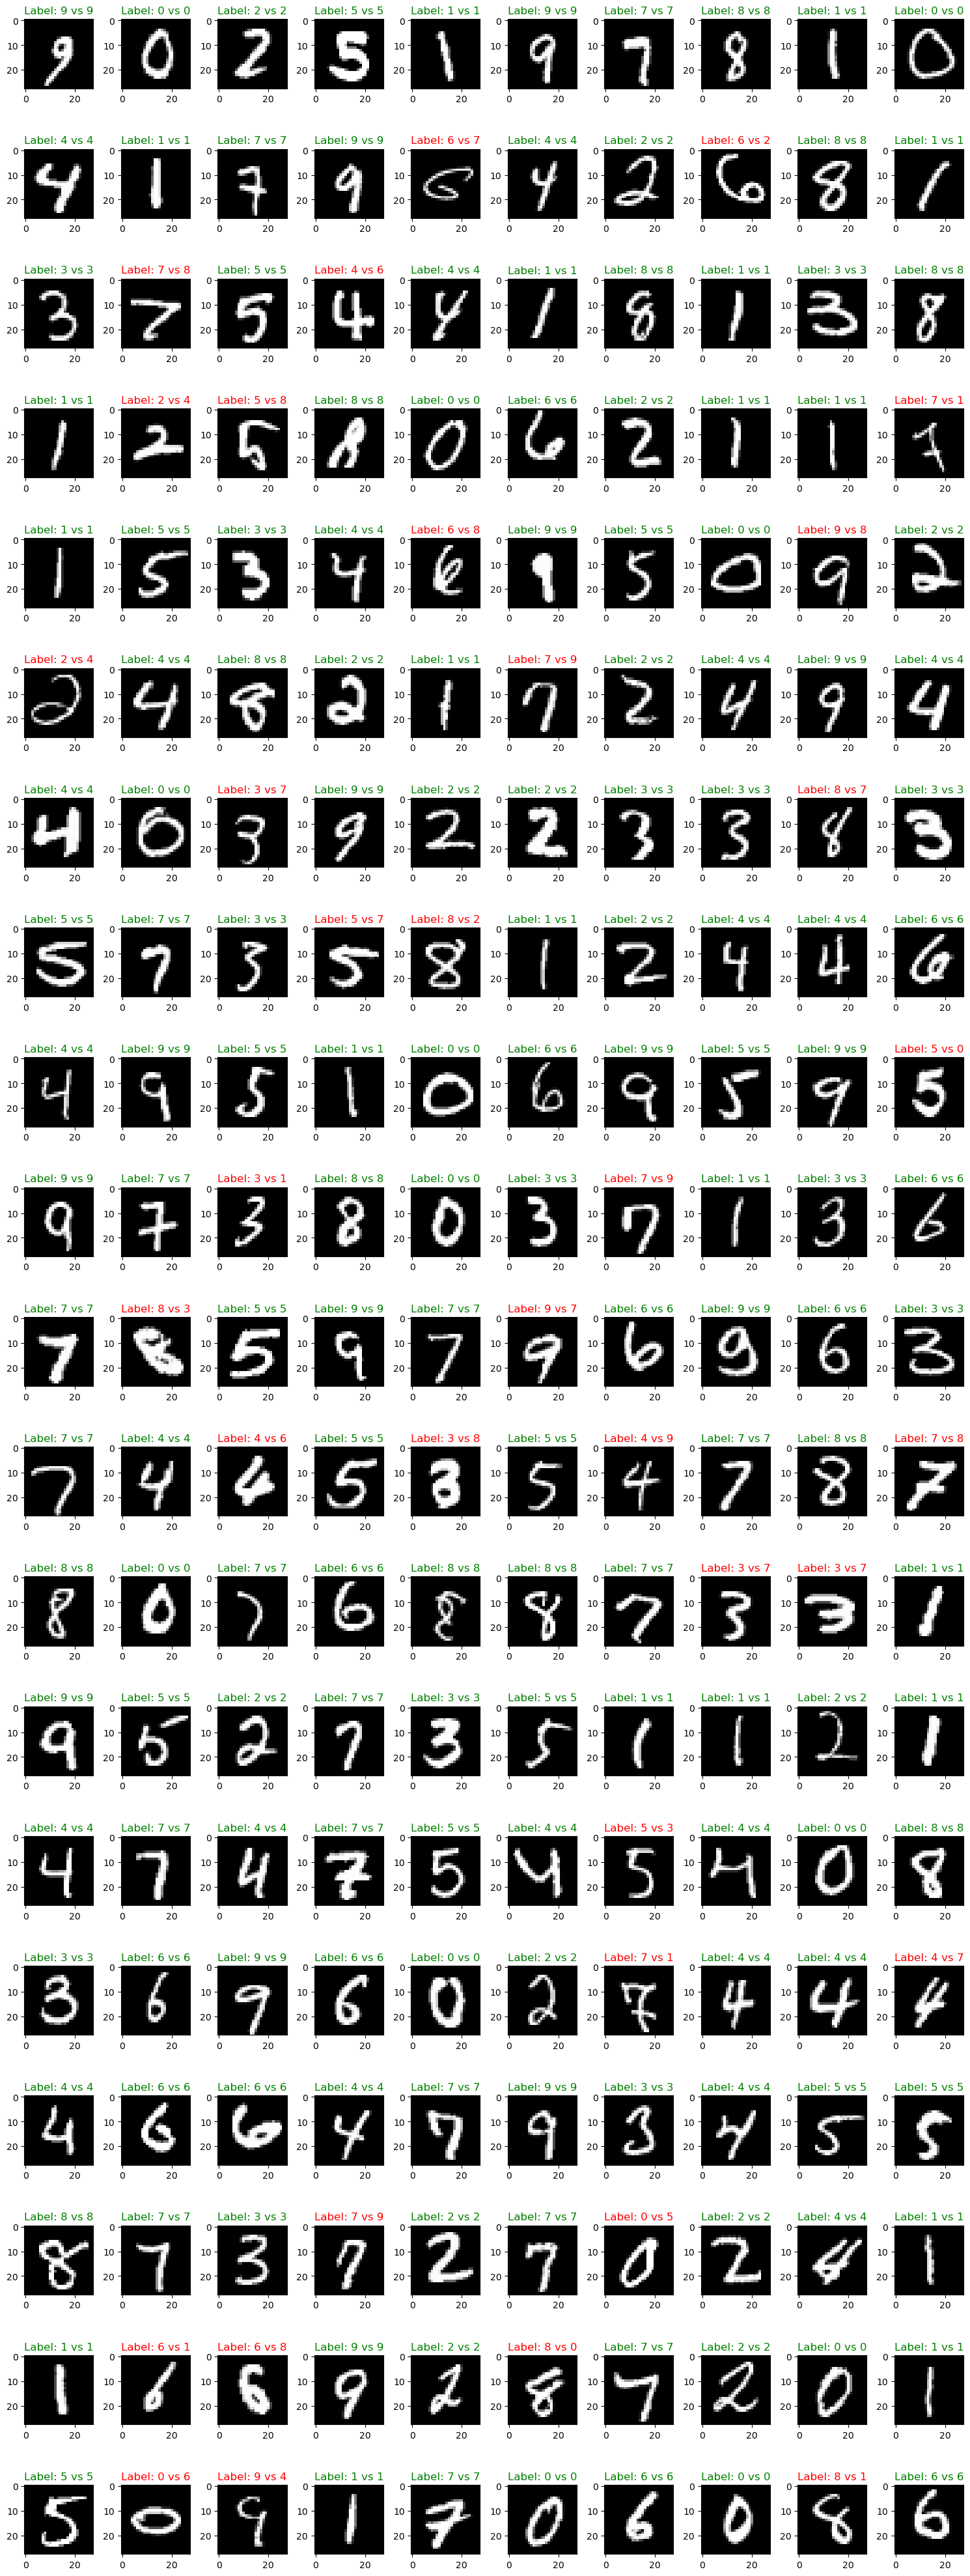

In [15]:
# visualize the result
cls.visualize()

In [24]:
# print prediction accuracy
cls.Test()

0.835